In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time
from citipy import citipy
from datetime import datetime
from config import weather_api_key

In [2]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and Longitudes to a list
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude pair
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print length of cities to confirm sufficient amount
len(cities)

646

In [13]:
# Starting URL for Weather Map API Call
url = f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"

In [17]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval    ")
print("----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Increase record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Call API and get response as a json
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
    
    # If there is an error, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval    
----------------------------
Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | pangnirtung
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | saint-philippe
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | kawana waters
City not found. Skipping...
Processing Record 8 of Set 1 | athabasca
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | namie
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | chagda
City not found. Skipping...
Processing Record 13 of Set 1 | kathu
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | llangefni
Processing Record 16 of Set 1 | rawson
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | codrington
Processing Record 19 of Set 1 | harer
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | tiksi
Processing Record 22 of 

Processing Record 36 of Set 4 | ahipara
Processing Record 37 of Set 4 | bajo baudo
City not found. Skipping...
Processing Record 38 of Set 4 | upernavik
Processing Record 39 of Set 4 | provideniya
Processing Record 40 of Set 4 | roebourne
Processing Record 41 of Set 4 | lakselv
Processing Record 42 of Set 4 | turbat
Processing Record 43 of Set 4 | kerki
City not found. Skipping...
Processing Record 44 of Set 4 | kapra
Processing Record 45 of Set 4 | umm lajj
Processing Record 46 of Set 4 | abong mbang
Processing Record 47 of Set 4 | kysyl-syr
Processing Record 48 of Set 4 | husavik
Processing Record 49 of Set 4 | ponta do sol
Processing Record 50 of Set 4 | lubao
Processing Record 1 of Set 5 | aasiaat
Processing Record 2 of Set 5 | cedar city
Processing Record 3 of Set 5 | kimbe
Processing Record 4 of Set 5 | kapchorwa
Processing Record 5 of Set 5 | kavaratti
Processing Record 6 of Set 5 | nautla
Processing Record 7 of Set 5 | cubara
Processing Record 8 of Set 5 | skibotn
Processing Re

Processing Record 23 of Set 8 | flores
Processing Record 24 of Set 8 | lompoc
Processing Record 25 of Set 8 | coquimbo
Processing Record 26 of Set 8 | kassala
Processing Record 27 of Set 8 | solnechnyy
Processing Record 28 of Set 8 | acajutla
Processing Record 29 of Set 8 | robertsport
Processing Record 30 of Set 8 | balsas
Processing Record 31 of Set 8 | bardstown
Processing Record 32 of Set 8 | halalo
City not found. Skipping...
Processing Record 33 of Set 8 | makinsk
Processing Record 34 of Set 8 | guane
Processing Record 35 of Set 8 | oranjestad
Processing Record 36 of Set 8 | kontagora
Processing Record 37 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | divo
Processing Record 40 of Set 8 | balakhninskiy
Processing Record 41 of Set 8 | anuradhapura
Processing Record 42 of Set 8 | terme
Processing Record 43 of Set 8 | kingman
Processing Record 44 of Set 8 | barra patuca
Processing Record 45 of Set 8 | muborak


City not found. Skipping...
Processing Record 11 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 12 of Set 12 | macapa
Processing Record 13 of Set 12 | namatanai
Processing Record 14 of Set 12 | mirnyy
Processing Record 15 of Set 12 | rassvet
Processing Record 16 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 17 of Set 12 | kolosovka
Processing Record 18 of Set 12 | kanke
Processing Record 19 of Set 12 | stavrovo
Processing Record 20 of Set 12 | kokoda
Processing Record 21 of Set 12 | juarez
Processing Record 22 of Set 12 | mikkeli
Processing Record 23 of Set 12 | kanigiri
Processing Record 24 of Set 12 | nikolsk
Processing Record 25 of Set 12 | ocampo
Processing Record 26 of Set 12 | ukiah
Processing Record 27 of Set 12 | champoton
Processing Record 28 of Set 12 | valley city
Processing Record 29 of Set 12 | ancud
Processing Record 30 of Set 12 | luwuk
Processing Record 31 of Set 12 | biak
Processing Record 32 of Set 12 | dzhusaly
City not found.

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuatapere,-46.1333,167.6833,33.08,91,12,4.23,NZ,2022-09-30 18:21:47
1,Pangnirtung,66.1451,-65.7125,36.84,49,100,3.40,CA,2022-09-30 18:21:47
2,Hithadhoo,-0.6000,73.0833,81.79,72,83,8.86,MV,2022-09-30 18:21:48
3,Saint-Philippe,-21.3585,55.7679,67.59,83,39,10.98,RE,2022-09-30 18:21:48
4,Punta Arenas,-53.1500,-70.9167,50.11,43,0,35.68,CL,2022-09-30 18:21:48
5,Albany,42.6001,-73.9662,60.58,62,100,1.01,US,2022-09-30 18:15:09
6,Athabasca,54.7169,-113.2854,59.41,55,99,6.51,CA,2022-09-30 18:21:49
7,Port Elizabeth,-33.9180,25.5701,64.69,94,20,9.22,ZA,2022-09-30 18:21:46
8,Namie,37.4833,141.0000,57.97,96,0,5.14,JP,2022-09-30 18:21:50
9,Bredasdorp,-34.5322,20.0403,54.36,88,81,5.95,ZA,2022-09-30 18:21:50


In [19]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tuatapere,NZ,2022-09-30 18:21:47,-46.1333,167.6833,33.08,91,12,4.23
1,Pangnirtung,CA,2022-09-30 18:21:47,66.1451,-65.7125,36.84,49,100,3.40
2,Hithadhoo,MV,2022-09-30 18:21:48,-0.6000,73.0833,81.79,72,83,8.86
3,Saint-Philippe,RE,2022-09-30 18:21:48,-21.3585,55.7679,67.59,83,39,10.98
4,Punta Arenas,CL,2022-09-30 18:21:48,-53.1500,-70.9167,50.11,43,0,35.68
...,...,...,...,...,...,...,...,...,...
580,Bairiki,KI,2022-09-30 18:38:42,1.3292,172.9752,80.60,78,20,12.66
581,Tromso,NO,2022-09-30 18:34:57,69.6496,18.9570,39.38,75,0,2.30
582,Portland,US,2022-09-30 18:30:45,45.5234,-122.6762,63.90,82,100,4.61
583,Yenagoa,NG,2022-09-30 18:38:42,4.9247,6.2642,75.79,92,100,4.65


In [20]:
# Create the output file (csv)
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract the relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

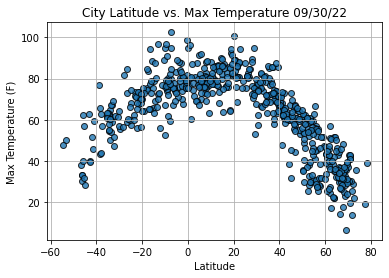

In [25]:
import time

# Build the scatter plot for latitudes vs. max temperature 
plt.scatter(lats, max_temps,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

plt.title(f"City Latitude vs. Max Temperature {time.strftime('%x')}")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

plt.show()

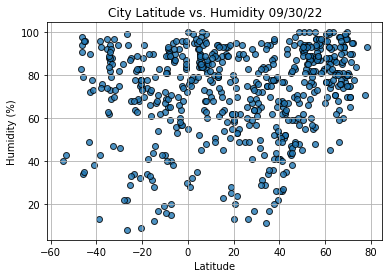

In [26]:
# Build the scatter plot for latitudes vs. humidity 
plt.scatter(lats, humidity,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

plt.title(f"City Latitude vs. Humidity {time.strftime('%x')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

plt.show()

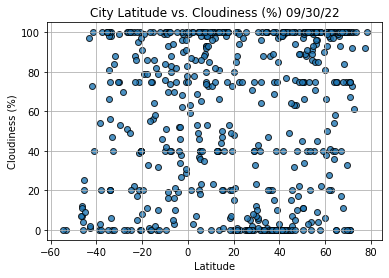

In [27]:
# Build the scatter plot for latitudes vs. cloudiness 
plt.scatter(lats, cloudiness,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

plt.title(f"City Latitude vs. Cloudiness (%) {time.strftime('%x')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

plt.show()

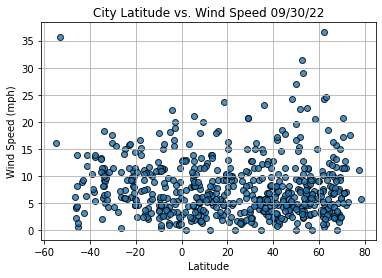

In [28]:
# Build the scatter plot for latitudes vs. wind speed 
plt.scatter(lats, wind_speed,
           edgecolor='black', linewidths=1, marker='o',
           alpha=0.8, label='Cities')

plt.title(f"City Latitude vs. Wind Speed {time.strftime('%x')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

plt.show()